In [1]:
from datetime import date

import pandas_datareader.data as web
import pandas as pd
import matplotlib.ticker as mtick

In [2]:
report_start = date.fromisoformat('2020-01-01')
report_end = date.today()

In [14]:
data = web.get_data_fred(['DGS5', 'DGS10', 'T5YIE', 'T10YIE', 'T10Y2Y', 'T10Y3M'], report_start, report_end) / 100.
data.dropna(inplace=True)

columns_with_semiannual_comp = [0, 1, 3, 4]

# Converting all CMT Yields to APY (i.e. all but breakeven inflation rates)
data.iloc[:, columns_with_semiannual_comp] = (data.iloc[:, columns_with_semiannual_comp]/2 + 1)**2 - 1

In [15]:
data['10y Tr. Yield - 5y Tr. Yield'] = data.DGS10 - data.DGS5
data['10y Breakeven Infl. Rate - 5y Breakeven Infl. Rate'] = data.T10YIE - data.T5YIE
data.rename(columns={'T10Y2Y': '10y Tr. Yield - 2y Tr. Yield',
                     'T10Y3M': '10y Tr. Yield - 3m Tr. Yield'}, inplace=True)

In [16]:
# Get rid of columns no longer required
data.drop(columns=data.columns[0:4], inplace=True)

# Rearrange columns
data = data.iloc[:, [2, 3, 0, 1]]

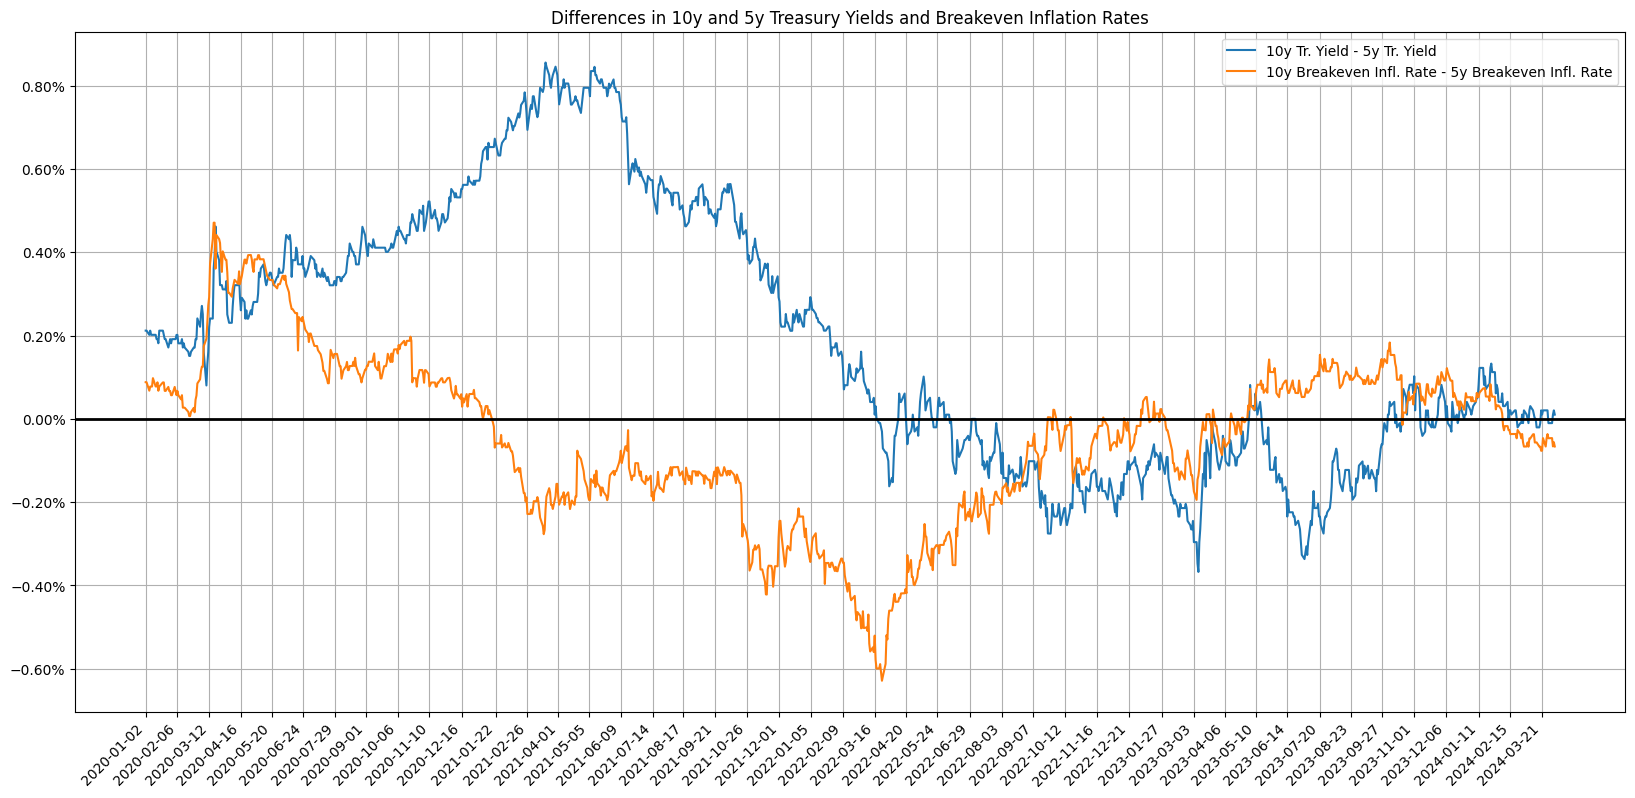

In [17]:
ax = data.iloc[:,:2].plot(figsize=(20,10), grid=True,
                          title='Differences in 10y and 5y Treasury Yields and Breakeven Inflation Rates',
                          xticks=data.index[::24], xlabel='', rot=45)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [18]:
date_of_inversion = data.iloc[:,0][data.iloc[:,0] < 0].index[0]
date_of_inversion_peak = data.iloc[:,0].idxmin()
print(f'The inversion of 10-Year - 5-Year yield curves happened on {date_of_inversion:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,0].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The inversion amounts to {data.iloc[-1,0]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-Year - 5-Year yield curves happened on 2022-03-21
The peak of inversion was -37bps and took place on 2023-03-08
The inversion amounts to +1bps as of 2024-04-04


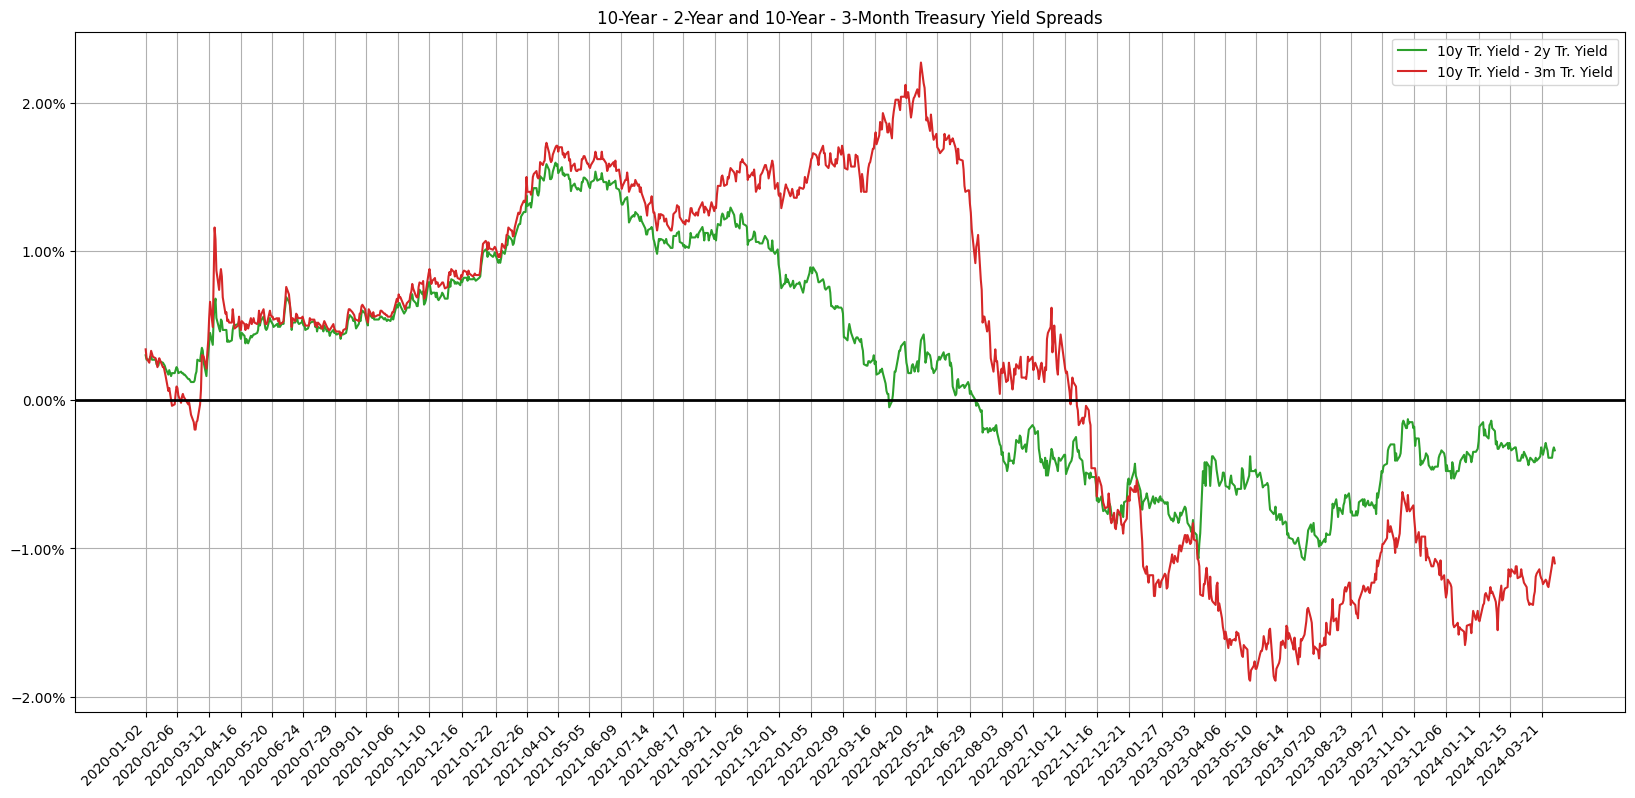

In [20]:
ax = data.iloc[:,2:].plot(figsize=(20,10), grid=True,
               title='10-Year - 2-Year and 10-Year - 3-Month Treasury Yield Spreads', color=['#2ca02c', '#d62728'],
               xticks=data.index[::24], xlabel='', rot=45)
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

In [22]:
date_of_inversion = data.iloc[:,2][data.iloc[:,2] < 0].index[0]
date_of_inversion_peak = data.iloc[:,2].idxmin()
print(f'The inversion of 10-years - 2-Year yields curves happened on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The peak of inversion was {data.iloc[:,2].min()*1e4:.0f}bps and took place on {date_of_inversion_peak:%Y-%m-%d}')
print(f'The inversion amounts to {data.iloc[-1,2]*1e4:+.0f}bps as of {data.index[-1]:%Y-%m-%d}')

The inversion of 10-years - 2-Year yields curves happened on 2023-07-03
The peak of inversion was -108bps and took place on 2023-07-03
The inversion amounts to -34bps as of 2024-04-04


In [23]:
data2 = web.get_data_fred(['EXPINF5YR', 'T5YIEM', 'EXPINF2YR', 'T10YIEM', 'EXPINF10YR', 'T10Y2YM'],
                          '2000-01-01', report_end) / 100

data2.dropna(inplace=True)

In [ ]:
# Only  T10Y2YM is base on a yield with semiannual compounding frequency
columns_with_semiannual_comp = ['T10Y2YM']

# Converting all CMT Yields to APY (i.e. all but breakeven inflation rates) 
data2.loc[:, columns_with_semiannual_comp] = (data2.loc[:, columns_with_semiannual_comp]/2 + 1) ** 2 - 1

In [24]:
abs_diff = (data2.iloc[:,0]-data2.iloc[:,1]).abs()
abs_diff.describe()

count    255.000000
mean       0.003169
std        0.003700
min        0.000018
25%        0.000821
50%        0.001925
75%        0.004160
max        0.031894
dtype: float64

In [25]:
abs_diff.sem()

0.00023170900405855053

In [26]:
# Getting rid of no longer needed columns, and calculating the difference between 10-Year and 2-Year
# expected inflation

data2['10y Breakeven Infl. Rate - 2y Expected Infl. Rate'] = data2.iloc[:,3] - data2.iloc[:,2]
data2['10y Expected Infl. Rate - 2y Expected Infl. Rate'] = data2.iloc[:,4] - data2.iloc[:,2]
data2 = data2.iloc[:,5:]
data2.rename(columns={'T10Y2YM':'10y Tr. Yields - 2y Tr. Yields'}, inplace=True)

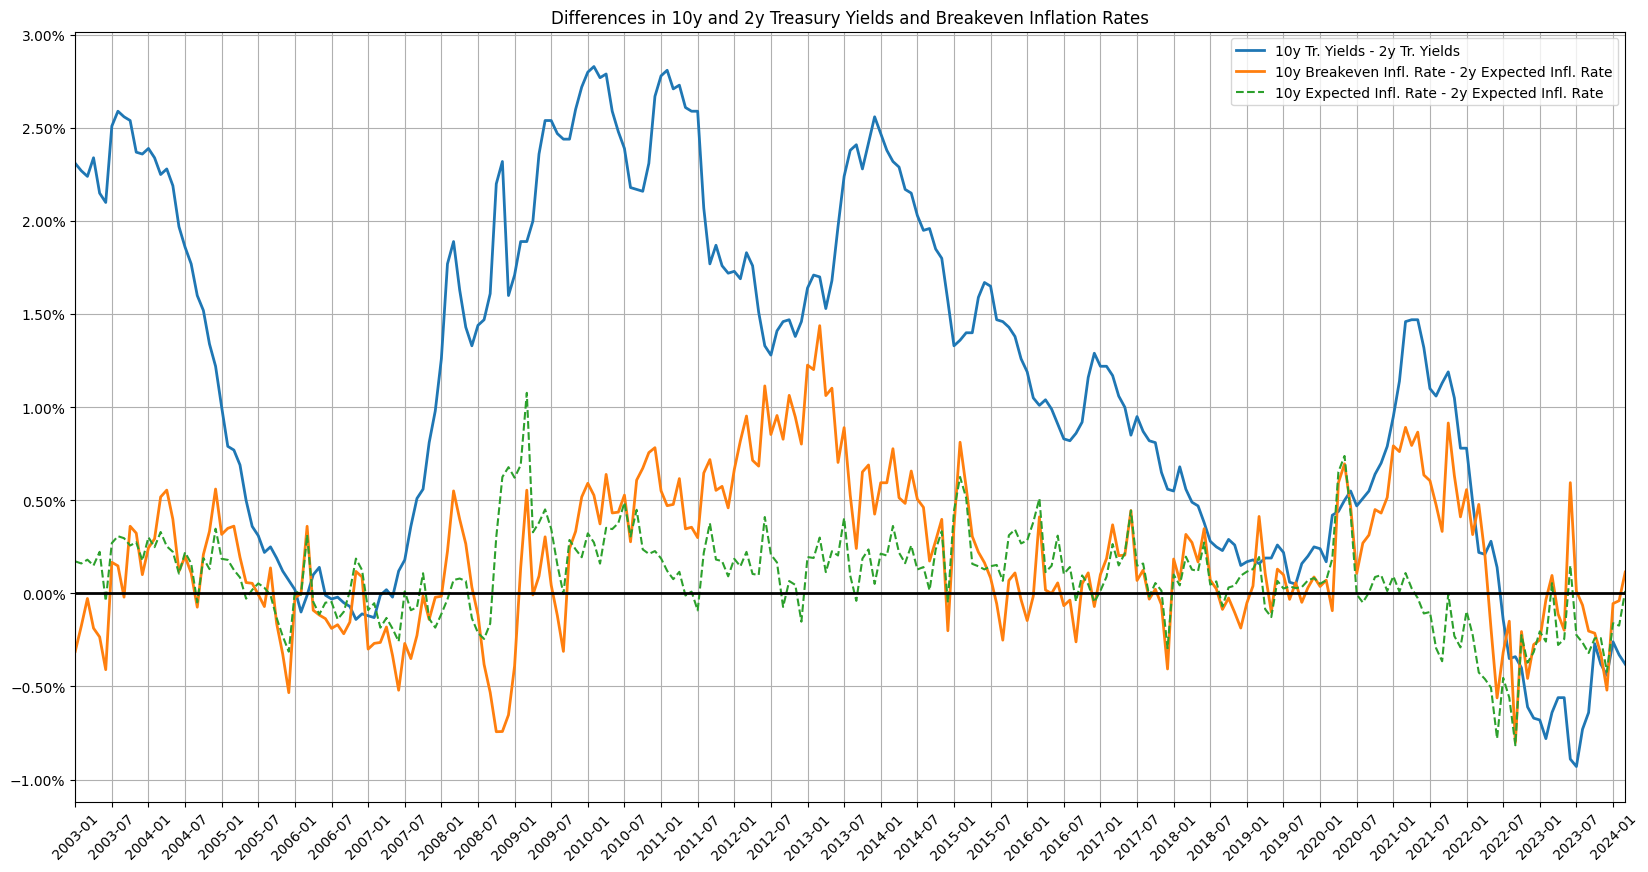

In [28]:
ax = data2.iloc[:, :2].plot(figsize=(20,10), grid=True, linewidth=2,
                            title='Differences in 10y and 2y Treasury Yields and Breakeven Inflation Rates',
                            xticks=data2.index[::6], xlabel='', rot=45)

ax = data2.iloc[:, 2:].plot(ax=ax, grid=True, xticks=data2.index[::6], xlabel='', rot=45, linestyle='--')
ax.axhline(y=0, lw=2, c='k')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
_ = ax.set_xticklabels(list(map('{:%Y-%m}'.format, data2.index[::6])))